In [1]:
from jupyterthemes import jtplot
jtplot.style(theme="chesterish")
import torch
import torch.nn as nn
import torchdiffeq
import matplotlib.pyplot as plt
from torch.nn.functional import mse_loss
import numpy as np 
from tqdm.notebook import tqdm


from torchdiffeq import odeint_adjoint as odeint

In [2]:
class Lambda(nn.Module):
    def forward(self,x):
         return x * x 
        
class ODEBlock(nn.Module):
    def __init__(self):
        super(ODEBlock,self).__init__()
        layers =[nn.Linear(1,32),
                 nn.ReLU(),
                 nn.Linear(32,64),
                 nn.ReLU(),
                 nn.Linear(64,64),
                 nn.ReLU(),
                 nn.Linear(64,1)]
        self.net = nn.Sequential(
            *layers
        )
    
    def forward(self,t,x):
        #copy_x = torch.clone(x)
        #for i in range(10):
        #    copy_x = x + self.net(copy_x)
        x = self.net(x)
            
        return x
    
class ODENet(nn.Module):
    def __init__(self, func):
        super(ODENet,self).__init__()
        self.func = func
        self.intergrated_time = torch.Tensor([0.,1.]).float()
    def forward(self,x):
        out = odeint(self.func, x, self.intergrated_time)
        return out[1]
        
def get_batch(X,Y):
    data = torch.stack(X,Y) 
    print(data.shape)


In [3]:
ode_func = ODEBlock()
model = ODENet(ode_func)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
epochs = 250
losses = []

In [ ]:

for i in tqdm(range(epochs)):
    optimizer.zero_grad()
    x = torch.rand((8,1)) * 4 - 2
    y = x ** 3
    pred_y = model(x)
    loss = torch.mean((y - pred_y)**2)
    losses.append(loss.item())
    print(f"Epoch(s) {i+1} | Loss = {losses[-1]}")
    loss.backward()
    optimizer.step()

  0%|          | 0/250 [00:00<?, ?it/s]

Epoch(s) 1 | Loss = 3.6232059001922607
Epoch(s) 2 | Loss = 7.222836971282959
Epoch(s) 3 | Loss = 2.3857033252716064
Epoch(s) 4 | Loss = 5.496387481689453
Epoch(s) 5 | Loss = 6.069095611572266
Epoch(s) 6 | Loss = 3.86869740486145
Epoch(s) 7 | Loss = 3.183358907699585
Epoch(s) 8 | Loss = 0.8976607322692871
Epoch(s) 9 | Loss = 4.302594184875488
Epoch(s) 10 | Loss = 0.7062610387802124
Epoch(s) 11 | Loss = 0.5448466539382935
Epoch(s) 12 | Loss = 1.2873042821884155
Epoch(s) 13 | Loss = 1.279668927192688
Epoch(s) 14 | Loss = 2.6345293521881104
Epoch(s) 15 | Loss = 4.206297874450684
Epoch(s) 16 | Loss = 2.087820291519165
Epoch(s) 17 | Loss = 0.585715115070343
Epoch(s) 18 | Loss = 6.886377334594727
Epoch(s) 19 | Loss = 7.933156490325928
Epoch(s) 20 | Loss = 0.5807095170021057
Epoch(s) 21 | Loss = 6.426394939422607
Epoch(s) 22 | Loss = 8.000770568847656
Epoch(s) 23 | Loss = 1.638418197631836
Epoch(s) 24 | Loss = 0.2636297643184662
Epoch(s) 25 | Loss = 2.6549620628356934
Epoch(s) 26 | Loss = 1.79

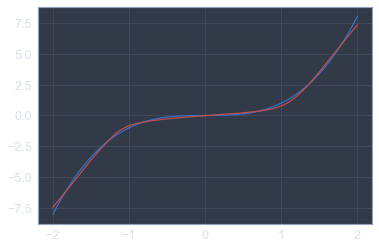

In [11]:
test = np.linspace(-2,2,1000)
plt.plot(test,test**3)
test_y = model(torch.linspace(-2,2,1000).reshape(1000,1))
plt.plot(test,test_y.detach().numpy(),color="r")
plt.show()